In [2]:
# TODO - find a way to make this install the poetry enviorment
import os
os.chdir("C:\\Users\yuvmi\PycharmProjects\SequenceModelLab")
!poetry install

Installing dependencies from lock file

No dependencies to install or update


In [3]:
import numpy as np
import re

In [4]:
import os
import glob
import pickle
from collections import defaultdict
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter
import torch

In [5]:
from src.visualizations.vis_utils import animate_SSM_state_dynamics

# Analysing the best results dynamics

## Reading result logs and saving best results

In [39]:
INSIGNIFICANT_LOSS_CHANGE = 0.02

class Result():
    
    def __init__(self, data):
        losses = np.array([l.entity for l in data["loss"]])
        l_epochs = np.array([l.epoch_logged for l in data["loss"]])
        if len(losses) == 0:
            self.min_loss = None
            return
        exploded = (np.argmax(losses) == len(losses) - 1)
        min_loss = np.min(losses)
        best_ker = data["kernel"][np.argmin(losses)-1].entity
    
        
        if np.isnan(min_loss):
            self.min_loss = None
            return
        elif np.isinf(min_loss):
            self.min_loss = None
            return
        else:
            self.min_loss = min_loss
        self.exploded = exploded
        self.best_ker = best_ker
        self.epoch_best_res = np.argmin(losses)
        self.best_A = data["A"][np.argmin(losses)-1].entity
        self.best_B = data["B"][np.argmin(losses)-1].entity
        self.best_C = data["C"][np.argmin(losses)-1].entity
        self.train_len = len(losses)
        self.effective_train_len = np.where(losses<INSIGNIFICANT_LOSS_CHANGE+self.min_loss)[0][0]
        self.losses = losses
        
    
    def __bool__(self):
        return self.min_loss is not None

In [40]:
def string_to_dict(string, pattern):
    regex = re.sub(r'{(.+?)}', r'(?P<_\1>.+)', pattern)
    values = list(re.search(regex, string).groups())
    keys = re.findall(r'{(.+?)}', pattern)
    _dict = dict(zip(keys, values))
    return _dict

In [41]:
# def get_hippo_params(filepath):
#     file_name = os.path.basename(file_path)
#     params = string_to_dict(filepath,"hippo_l{lag}_lr{lr}_dt{dt}_o{opt}")
#     params["exp_name"] = "hippo"
#     return params

# def get_ssm_params(filepath):
#     file_name = os.path.basename(file_path)
#     params = string_to_dict(filepath,"ssm_l{lag}_lr{lr}_n{noise}_d{diag_init}_b{BC_std}_o{opt}")
#     params["exp_name"] = "ssm"
#     return params

# def get_hippo_no_params(filepath):
#     file_name = os.path.basename(file_path)
#     params = string_to_dict(filepath,"hippo_no{no}_l{lag}_lr{lr}_dt{dt}_o{opt}")
#     params["exp_name"] = "hippo_no"
#     return params

# def get_rot_params(filepath):
#     file_name = os.path.basename(file_path)
#     params = string_to_dict(filepath,"rot_{rot_type}_l{lag}_lr{lr}_o{opt}")
#     params["exp_name"] = "rot"
#     return params

def get_params(filepath):
    file_name = os.path.basename(file_path)
    s = file_name.split("_")
    if s[2][0] == "i":
        exp_name = "_".join(s[:2])+"_"+"_".join(s[3:])
        i = int(s[2][1:])
    else:
        exp_name = "_".join(s[:3])+"_"+"_".join(s[4:])
        i = int(s[3][1:])
    params = {
        "exp_name":exp_name,
        "i":i
    }
    return params
    

In [42]:
experiments_results = defaultdict(list)
files = []

In [43]:
#experiment_file_regexs = [r"../results/grid/*"]
experiment_file_regexs = [r".\results\\variance\\*"]

In [44]:
for experiment_file_regex in experiment_file_regexs:
    for file_path in tqdm(glob.glob(experiment_file_regex)):
        if "filepart" in file_path:
            print(file_path)
            continue
            
        if file_path in files:
            continue
            
        file_name = os.path.basename(file_path)
        params = get_params(file_name)
        
        with open(file_path,"rb") as f:
            try:
                data = pickle.load(f)
            except:
                print(file_path)
                continue
            result = Result(data)
            if result:
                experiments_results[params["exp_name"]].append(Result(data))
            else:
                print(file_path)
                
        files.append(file_path)

  0%|          | 0/120 [00:00<?, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x0000020C1C3171F0>
Traceback (most recent call last):
  File "C:\Users\yuvmi\AppData\Local\pypoetry\Cache\virtualenvs\sequencemodellab-8OMl2XFc-py3.8\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "C:\Users\yuvmi\AppData\Local\pypoetry\Cache\virtualenvs\sequencemodellab-8OMl2XFc-py3.8\lib\site-packages\tqdm\notebook.py", line 288, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


.\results\\variance\hippo_noa_h64_i3_l60_lr0.1_dt0.1_oadam
.\results\\variance\ssm_h64_i3_l60_lr0.001_n0.001_d0.93_b0.1_oadam


In [29]:
[k for k in experiments_results.keys()]

['hippo_h64_l60_lr0.0001_dt0.05_oSGD',
 'hippo_h64_l60_lr0.001_dt0.1_oadam',
 'hippo_h64_l60_lr0.01_dt0.05_oadam',
 'hippo_h64_l60_lr5e-05_dt0.1_oSGD',
 'hippo_noac_h64_l60_lr0.001_dt0.1_oadam',
 'hippo_noa_h64_l60_lr0.1_dt0.1_oadam',
 'rot_h64_eq_l60_lr0.001_oadam',
 'rot_h64_eq_l60_lr0.005_oSGD',
 'ssm_h64_l60_lr0.001_n0.001_d0.93_b0.1_oadam',
 'ssm_h64_l60_lr0.001_n0.01_d0.9_b0.1_oadam',
 'ssm_h64_l60_lr0.01_n0.01_d0.93_b0.001_oSGD',
 'ssm_h64_l60_lr0.01_n0.01_d0.9_b0.1_oSGD']

In [34]:
exp_to_readable_name = {
'hippo_h64_l60_lr0.0001_dt0.05_oSGD':"hippo_sgd1",
'hippo_h64_l60_lr5e-05_dt0.1_oSGD':"hippo_sgd2",
'hippo_h64_l60_lr0.001_dt0.1_oadam':"hippo_adam1",
'hippo_h64_l60_lr0.01_dt0.05_oadam':"hippo_adam2",
'hippo_noac_h64_l60_lr0.001_dt0.1_oadam':"hippo_only_training_b",
'hippo_noa_h64_l60_lr0.1_dt0.1_oadam':"hippo_only_training_bc",
'rot_h64_eq_l60_lr0.001_oadam':"rot_equaly_spaced_adam",
'rot_h64_eq_l60_lr0.005_oSGD':"rot_equaly_spaced_sgd",
'ssm_h64_l60_lr0.001_n0.001_d0.93_b0.1_oadam':"ssm_adam_top_1",
'ssm_h64_l60_lr0.001_n0.01_d0.9_b0.1_oadam':"ssm_adam_top_2",
'ssm_h64_l60_lr0.01_n0.01_d0.93_b0.001_oSGD':"ssm_sgd_top_1",
'ssm_h64_l60_lr0.01_n0.01_d0.9_b0.1_oSGD':"ssm_sgd_top_2"
}

## Analysis

In [35]:
exp_to_mean_and_var_loss = {}
for exp_name in experiments_results.keys():
    losses = np.array([res.min_loss for res in experiments_results[exp_name]])
    eff_train_lens = np.array([res.effective_train_len for res in experiments_results[exp_name]])
    mean = np.mean(losses)
    median = np.median(losses)
    std = np.std(losses)
    exp_to_mean_and_var_loss[exp_to_readable_name[exp_name]] = {
        "mean":mean,
        "std":std,
        "median":median,
        "losses":losses,
        "eff_train_lens":eff_train_lens
    }

In [52]:
for key in exp_to_mean_and_var_loss.keys():
    print("exp_name: "+ key)
    v = exp_to_mean_and_var_loss[key]
    print("mean:{}".format(v["mean"]))
    print("std:{}".format(v["std"]))
    print("-"*20)

exp_name: hippo_sgd1
mean:1.0545375213027
std:0.9890734331640775
--------------------
exp_name: hippo_adam1
mean:0.10643155947327614
std:0.02052614991496049
--------------------
exp_name: hippo_adam2
mean:0.4216951087117195
std:0.6864231543404687
--------------------
exp_name: hippo_sgd2
mean:0.25075926780700686
std:0.03283632912151644
--------------------
exp_name: hippo_only_training_b
mean:0.6092555582523346
std:0.003908899864579323
--------------------
exp_name: hippo_only_training_bc
mean:0.5568109154701233
std:2.37524322464222e-05
--------------------
exp_name: rot_equaly_spaced_adam
mean:0.00048691832042118305
std:0.0014607220066270212
--------------------
exp_name: rot_equaly_spaced_sgd
mean:0.7116807078942656
std:1.9980265888110023
--------------------
exp_name: ssm_adam_top_1
mean:0.12836339738633898
std:0.038385504160906046
--------------------
exp_name: ssm_adam_top_2
mean:0.13096748739480973
std:0.04820598863065384
--------------------
exp_name: ssm_sgd_top_1
mean:0.821776

In [128]:
# for key in exp_to_mean_and_var_loss.keys():
#     print(key)
#     v = exp_to_mean_and_var_loss[key]
#     print("effective_train_lens:{}".format(v["losses"]))
#     print("-"*20)

In [37]:
for key in exp_to_mean_and_var_loss.keys():
    print(key)
    v = exp_to_mean_and_var_loss[key]
    print("effective_train_lens:{}".format(v["eff_train_lens"]))
    print("-"*20)

hippo_sgd1
effective_train_lens:[3477    0    0 4364    0    0 6793 3237 3421 2881]
--------------------
hippo_adam1
effective_train_lens:[3233 2209 3246 1649 4568 1880 4152 2824 2184 3096]
--------------------
hippo_adam2
effective_train_lens:[    0  4200  2631  1533  5695 10049  6019  3327  4141  3018]
--------------------
hippo_sgd2
effective_train_lens:[ 8751 10989 13459 17390 14297 16704 14545  8492  7066 16617]
--------------------
hippo_only_training_b
effective_train_lens:[ 7693  9186  7261  9840  9139  8049  9197  8885 10103  9228]
--------------------
hippo_only_training_bc
effective_train_lens:[6040 6375 7797 6446 6146 6943 7980 6162 7300]
--------------------
rot_equaly_spaced_adam
effective_train_lens:[ 633  912  825  699  841  846  809  954  740 1245]
--------------------
rot_equaly_spaced_sgd
effective_train_lens:[1041    0 2359 1625 2106 2980 2025 3993 1632 1538]
--------------------
ssm_adam_top_1
effective_train_lens:[18692 18492 18170 18820 19229 15624 17698 18296 18

In [50]:
def plot_loss(res):
    losses = res.losses[100:]
    plt.plot(losses)

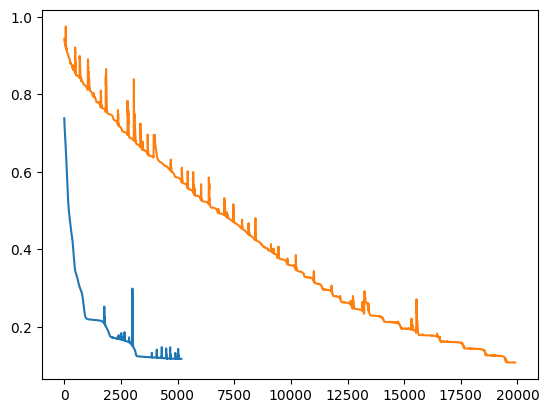

In [51]:
r_hip = experiments_results["hippo_h64_l60_lr0.001_dt0.1_oadam"][0]
r_ssm = experiments_results["ssm_h64_l60_lr0.001_n0.001_d0.93_b0.1_oadam"][0]
plot_loss(r_hip)
plot_loss(r_ssm)

In [59]:
class FullResult():
    
    def __init__(self, data):
        losses = np.array([l.entity for l in data["loss"]])
        l_epochs = np.array([l.epoch_logged for l in data["loss"]])
        if len(losses) == 0:
            self.min_loss = None
            return
        exploded = (np.argmax(losses) == len(losses) - 1)
        min_loss = np.min(losses)
        best_ker = data["kernel"][np.argmin(losses)-1].entity
        
        
        
        if np.isnan(min_loss):
            self.min_loss = None
        else:
            self.min_loss = min_loss
            
        self.exploded = exploded
        self.best_ker = best_ker
        self.epoch_best_res = np.argmin(losses)
        self.As = [l.entity for l in data["A"]]
        self.Bs = [l.entity for l in data["B"]]
        self.Cs = [l.entity for l in data["C"]]
        self.kernels = [l.entity for l in data["kernel"]]
        self.epochs = np.array([l.epoch_logged for l in data["loss"]])
        self.losses = losses
    
    def __bool__(self):
        return self.min_loss is not None

def get_sorted_eigen(matrix):
    if matrix.ndim == 1:
        e = matrix
    else:
        e = np.linalg.eig(matrix)[0]
    #e = np.abs(e)
    return e

def get_result_from_file_path(file_path): 
    with open(file_path,"rb") as f:
        data = pickle.load(f)
        result = FullResult(data)
        if result:
            return result
        else:
            return "None"


def get_dynamics(filepath):
    r = get_result_from_file_path(filepath)
    
    eig = []
    for A in tqdm(r.As):
        eig.append(get_sorted_eigen(A))
    eig = np.array(eig)
    Cs = np.abs(np.array(r.Cs)[:,0,:])
    Bs = np.abs(np.array(r.Bs)[:,0,:])
    return eig,Bs,Cs
    

In [60]:
exp_name = "ssm_h64_i0_l60_lr0.001_n0.001_d0.93_b0.1_oadam"
filepath = '.\\results\\variance\\{name}'.format(name=exp_name)
eig,Bs,Cs = get_dynamics(filepath)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [63]:
eig.imag.shape

(20000, 64)

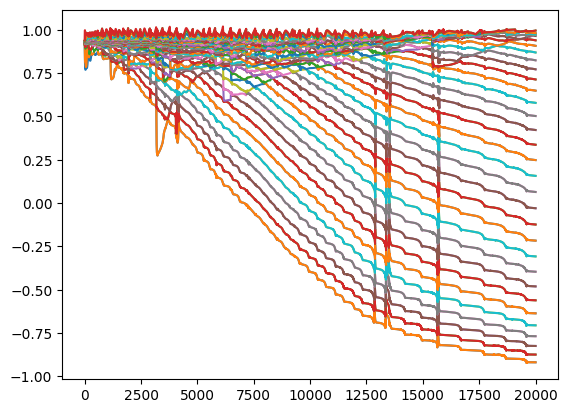

In [65]:
sorted_eig = np.sort(eig.real,axis = 1)
plt.plot(sorted_eig)